In [12]:
from langgraph.graph import Graph # type: ignore
from langchain_groq import ChatGroq  # type: ignore
from dotenv import load_dotenv  # type: ignore
import os
from groq import Groq  # type: ignore

In [13]:
load_dotenv()
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

In [14]:
llm = ChatGroq(model="llama3-70b-8192")

In [15]:
llm.invoke("Hello, how are you?").content

"I'm just a language model, I don't have feelings or emotions, but I'm functioning properly and ready to assist you with any questions or tasks you may have. It's great to chat with you! How can I help you today?"

In [16]:
def function1(input: str):
    response = llm.invoke(input).content
    return response

In [17]:
def function2(input: str):
    upper_str = input.upper()
    return upper_str

In [18]:
workflow = Graph()

In [ ]:
workflow.add_node("function1", function1)
workflow.add_node("function2", function2)
workflow.add_edge("function1", "function2")
# workflow.add_edge("function2", "function1")          # Bidirectional edge
workflow.set_entry_point("function1")
workflow.set_finish_point("function2")

In [20]:
app = workflow.compile()

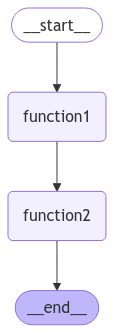

In [21]:
from IPython.display import Image, display # type: ignore

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [22]:
app.invoke("Who is the president of India?")

'AS OF MY KNOWLEDGE CUTOFF, THE PRESIDENT OF INDIA IS DROUPADI MURMU. SHE TOOK OFFICE ON JULY 25, 2022, AND IS THE 15TH PRESIDENT OF INDIA.'